In [1]:
import numpy as np
import os 
import sys
import numba 
import matplotlib.pyplot as plt
import iminuit 
import scipy

from template_fit import *

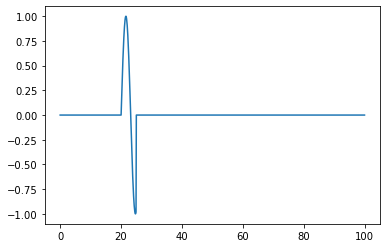

In [2]:
xs = np.linspace(0,100,1000)
ys = np.zeros_like(xs)

ys[200:250] = np.sin(xs)[:50]

plt.plot(xs,ys)

In [3]:
template = LXeTemplate()
template.form_template(xs,ys)

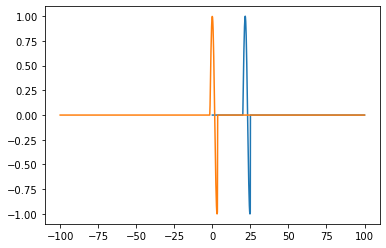

In [4]:
plt.plot(xs,ys)
xs2 = np.linspace(-100,100,1000)
plt.plot(xs2, template.template(xs2))
# plt.xlim(0,3)

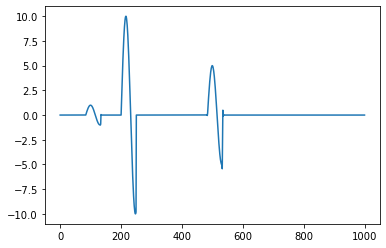

In [5]:
xs_shift = xs - 10
ys_shift = template.template(xs_shift)

xs_shift2 = xs - 50
ys_shift2 = template.template(xs_shift2)*5.

ys2 = ys*10 + ys_shift + ys_shift2

plt.plot(ys2)

fit = TemplateFit((xs,ys2), template)

(<Figure size 1080x360 with 1 Axes>, <AxesSubplot:>)

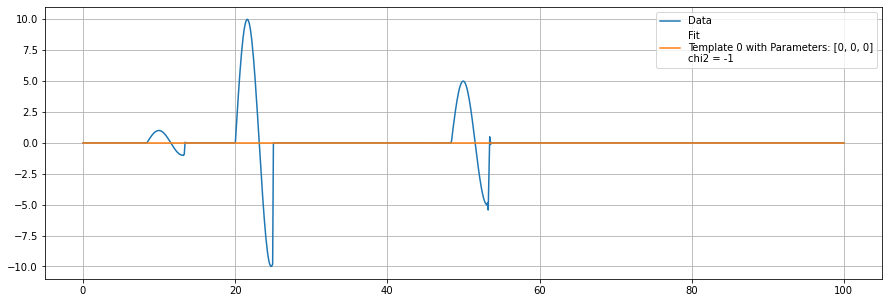

In [6]:
fit.plot()

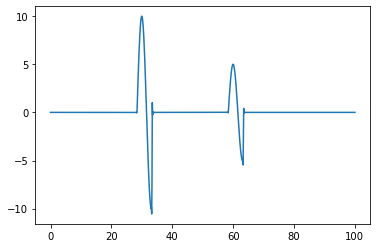

In [7]:
template_out = fit.template_function(xs, [10,100,-30, 5, 0, -60])

plt.plot(xs,template_out)

In [8]:
template_out

array([-4.41959431e-107, -4.38267179e-107, -4.34600103e-107,
       -4.30958066e-107, -4.27340931e-107, -4.23748560e-107,
       -4.20180817e-107, -4.16637565e-107, -4.13118665e-107,
       -4.09623982e-107, -4.06153378e-107, -4.02706716e-107,
       -3.99283859e-107, -3.95884669e-107, -3.92509010e-107,
       -3.89156744e-107, -3.85827734e-107, -3.82521844e-107,
       -3.79238936e-107, -3.75978873e-107, -3.72741517e-107,
       -3.69526732e-107, -3.66334381e-107, -3.63164326e-107,
       -3.60016431e-107, -3.56890558e-107, -3.53786569e-107,
       -3.50704329e-107, -3.47643700e-107, -3.44604544e-107,
       -3.41586725e-107, -3.38590105e-107, -3.35614547e-107,
       -3.32659915e-107, -3.29726071e-107, -3.26812877e-107,
       -3.23920198e-107, -3.21047895e-107, -3.18195832e-107,
       -3.15363871e-107, -3.12551875e-107, -3.09759708e-107,
       -3.06987232e-107, -3.04234309e-107, -3.01500804e-107,
       -2.98786578e-107, -2.96091495e-107, -2.93415417e-107,
       -2.90758208e-107,

In [9]:
fit.do_single_fit(xs,template_out, param_guess=[10.,2.,-23.])

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5819 (chi2/ndof = 5.8)     │              Nfcn = 29               │
│ EDM = 2.57e+03 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   10.0    │    0.2    │            │            │    0    │         │       │
│ 1 │ x1   │   2.00    │   0.02    │            │            │         │         │  yes  │
│ 2 │ x2   │  -22.973  │   0.013   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬────────────────────────────┐
│    │       x0       x1       x2 │
├────┼────────────────────────────┤
│ x0 │   0.0384        0 9.07e-08 │
│ x1 │        0        0        0 │
│ x2 │ 9.07e-08        0  0.00017 │
└────┴────────────────────────────┘

9.995255550431251 21.621621621621625
Fitting with Current guess: [9.995255550431251, 0, -21.621621621621625]
Fit valid: True
Fit params: <ValueView x0=9.995255550431251 x1=0.0 x2=-21.621621621621625>
Fit chi2: 0.6735159078114723


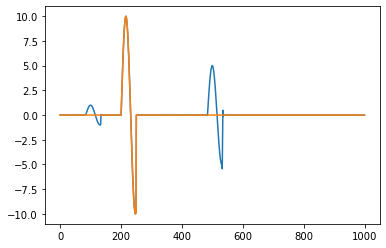

4.999072814905758 49.94994994994995
   -> Residual Fit valid: False
   -> Residual Fit params: <ValueView x0=4.999072814905758 x1=0.0 x2=-49.94994994994995>
   -> Residual Fit chi2: 0.03399357453125963


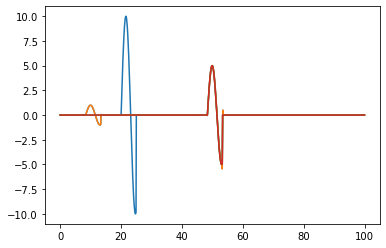

Fitting with Current guess: [9.995255550431251, 0.0, -21.621621621621625, 4.999072814905758, 0.0, -49.94994994994995]
Fit valid: False
Fit params: <ValueView x0=9.995255550431251 x1=0.0 x2=-21.621621621621625 x3=4.999072814905758 x4=0.0 x5=-49.94994994994995>
Fit chi2: 0.034061834721081444


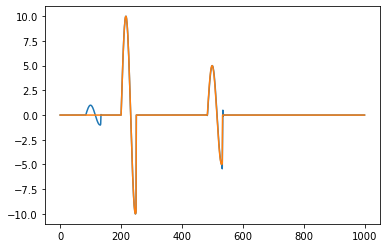

0.9991671381705306 10.01001001001001
   -> Residual Fit valid: False
   -> Residual Fit params: <ValueView x0=0.9991671381705305 x1=0.0 x2=-10.01001001001001>
   -> Residual Fit chi2: 0.00804334772719817


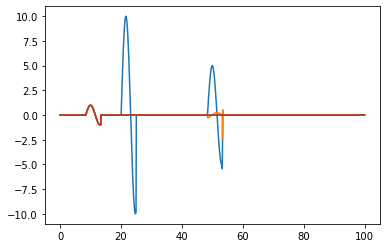

Fitting with Current guess: [9.995255550431251, 0.0, -21.621621621621625, 4.999072814905758, 0.0, -49.94994994994995, 0.9991671381705305, 0.0, -10.01001001001001]
Fit valid: False
Fit params: <ValueView x0=9.995255550431251 x1=0.0 x2=-21.621621621621625 x3=4.999072814905758 x4=0.0 x5=-49.94994994994995 x6=0.9991671381705305 x7=0.0 x8=-10.01001001001001>
Fit chi2: 0.00807571532368589


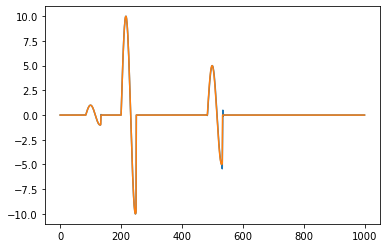

0.4913915941632445 53.453453453453456
   -> Residual Fit valid: False
   -> Residual Fit params: <ValueView x0=0.49139159416324474 x1=0.0 x2=-52.91891891891892>
   -> Residual Fit chi2: 0.014908546478529532


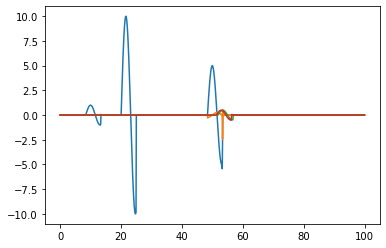

Fitting with Current guess: [9.995255550431251, 0.0, -21.621621621621625, 4.999072814905758, 0.0, -49.94994994994995, 0.9991671381705305, 0.0, -10.01001001001001, 0.49139159416324474, 0.0, -52.91891891891892]
Fit valid: False
Fit params: <ValueView x0=9.995255550431251 x1=0.0 x2=-21.621621621621625 x3=4.999072814905758 x4=0.0 x5=-49.94994994994995 x6=0.9991671381705305 x7=0.0 x8=-10.01001001001001 x9=0.49139159416324474 x10=0.0 x11=-52.91891891891892>
Fit chi2: 0.014998719138681931


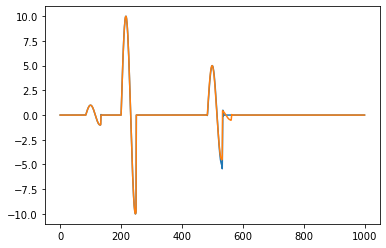

0.5223052715545611 56.15615615615616
   -> Residual Fit valid: False
   -> Residual Fit params: <ValueView x0=0.5223052715545611 x1=0.0 x2=-55.7033533205756>
   -> Residual Fit chi2: 0.016237868204180026


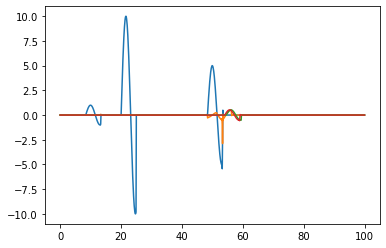

Fitting with Current guess: [9.995255550431251, 0.0, -21.621621621621625, 4.999072814905758, 0.0, -49.94994994994995, 0.9991671381705305, 0.0, -10.01001001001001, 0.49139159416324474, 0.0, -52.91891891891892, 0.5223052715545611, 0.0, -55.7033533205756]
Fit valid: False
Fit params: <ValueView x0=9.995255550431251 x1=0.0 x2=-21.621621621621625 x3=4.999072814905758 x4=0.0 x5=-49.94994994994995 x6=0.9991671381705305 x7=0.0 x8=-10.01001001001001 x9=0.49139159416324474 x10=0.0 x11=-52.91891891891892 x12=0.5223052715545611 x13=0.0 x14=-55.7033533205756>
Fit chi2: 0.01636908330077946


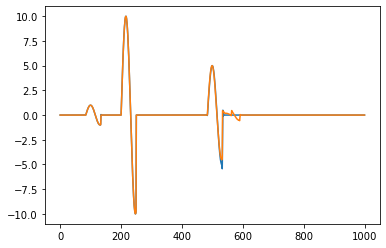

0.5686978765396142 58.95895895895896
   -> Residual Fit valid: False
   -> Residual Fit params: <ValueView x0=0.5686978765396142 x1=0.0 x2=-58.41872764330063>
   -> Residual Fit chi2: 0.0179894620376987


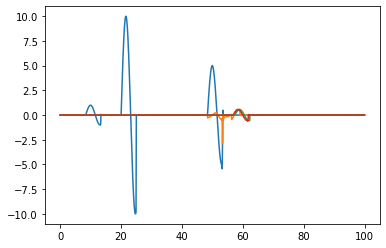

Fitting with Current guess: [9.995255550431251, 0.0, -21.621621621621625, 4.999072814905758, 0.0, -49.94994994994995, 0.9991671381705305, 0.0, -10.01001001001001, 0.49139159416324474, 0.0, -52.91891891891892, 0.5223052715545611, 0.0, -55.7033533205756, 0.5686978765396142, 0.0, -58.41872764330063]
Fit valid: False
Fit params: <ValueView x0=9.995255550431251 x1=0.0 x2=-21.621621621621625 x3=4.999072814905758 x4=0.0 x5=-49.94994994994995 x6=0.9991671381705305 x7=0.0 x8=-10.01001001001001 x9=0.49139159416324474 x10=0.0 x11=-52.91891891891892 x12=0.5223052715545611 x13=0.0 x14=-55.7033533205756 x15=0.5686978765396142 x16=0.0 x17=-58.41872764330063>
Fit chi2: 0.018171541612979052


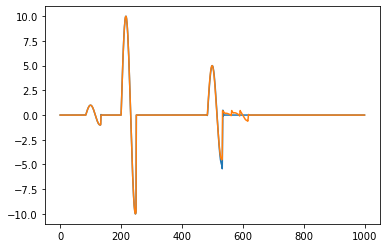

0.610214051783355 61.66166166166167
   -> Residual Fit valid: False
   -> Residual Fit params: <ValueView x0=0.610214051783355 x1=0.0 x2=-61.182058590221565>
   -> Residual Fit chi2: 0.019891156725416775


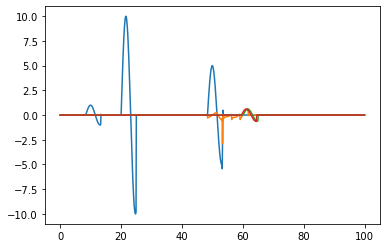

Fitting with Current guess: [9.995255550431251, 0.0, -21.621621621621625, 4.999072814905758, 0.0, -49.94994994994995, 0.9991671381705305, 0.0, -10.01001001001001, 0.49139159416324474, 0.0, -52.91891891891892, 0.5223052715545611, 0.0, -55.7033533205756, 0.5686978765396142, 0.0, -58.41872764330063, 0.610214051783355, 0.0, -61.182058590221565]
Fit valid: False
Fit params: <ValueView x0=9.995255550431251 x1=0.0 x2=-21.621621621621625 x3=4.999072814905758 x4=0.0 x5=-49.94994994994995 x6=0.9991671381705305 x7=0.0 x8=-10.01001001001001 x9=0.49139159416324474 x10=0.0 x11=-52.91891891891892 x12=0.5223052715545611 x13=0.0 x14=-55.7033533205756 x15=0.5686978765396142 x16=0.0 x17=-58.41872764330063 x18=0.610214051783355 x19=0.0 x20=-61.182058590221565>
Fit chi2: 0.020133239768728137


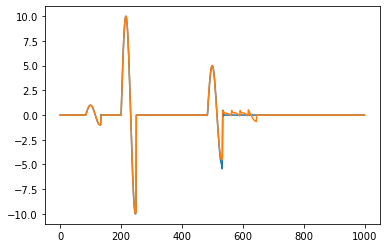

0.6534470409164451 64.46446446446447
   -> Residual Fit valid: False
   -> Residual Fit params: <ValueView x0=0.6534470409164452 x1=0.0 x2=-63.917848540295374>
   -> Residual Fit chi2: 0.022043926249526162


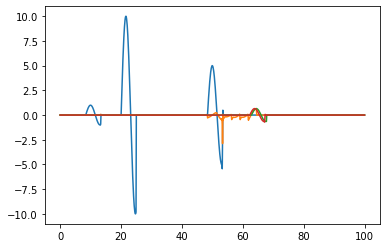

Fitting with Current guess: [9.995255550431251, 0.0, -21.621621621621625, 4.999072814905758, 0.0, -49.94994994994995, 0.9991671381705305, 0.0, -10.01001001001001, 0.49139159416324474, 0.0, -52.91891891891892, 0.5223052715545611, 0.0, -55.7033533205756, 0.5686978765396142, 0.0, -58.41872764330063, 0.610214051783355, 0.0, -61.182058590221565, 0.6534470409164452, 0.0, -63.917848540295374]
Fit valid: False
Fit params: <ValueView x0=9.995255550431251 x1=0.0 x2=-21.621621621621625 x3=4.999072814905758 x4=0.0 x5=-49.94994994994995 x6=0.9991671381705305 x7=0.0 x8=-10.01001001001001 x9=0.49139159416324474 x10=0.0 x11=-52.91891891891892 x12=0.5223052715545611 x13=0.0 x14=-55.7033533205756 x15=0.5686978765396142 x16=0.0 x17=-58.41872764330063 x18=0.610214051783355 x19=0.0 x20=-61.182058590221565 x21=0.6534470409164452 x22=0.0 x23=-63.917848540295374>
Fit chi2: 0.022357559346572266


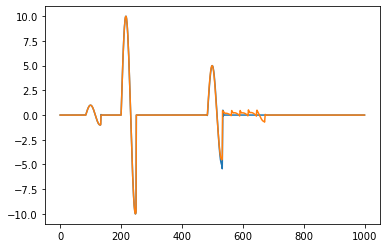

0.7072470100230156 67.16716716716716
   -> Residual Fit valid: False
   -> Residual Fit params: <ValueView x0=0.7072470100230155 x1=0.0 x2=-66.68794429013542>
   -> Residual Fit chi2: 0.024687726062476864


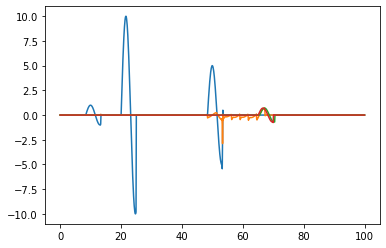

Fitting with Current guess: [9.995255550431251, 0.0, -21.621621621621625, 4.999072814905758, 0.0, -49.94994994994995, 0.9991671381705305, 0.0, -10.01001001001001, 0.49139159416324474, 0.0, -52.91891891891892, 0.5223052715545611, 0.0, -55.7033533205756, 0.5686978765396142, 0.0, -58.41872764330063, 0.610214051783355, 0.0, -61.182058590221565, 0.6534470409164452, 0.0, -63.917848540295374, 0.7072470100230155, 0.0, -66.68794429013542]
Fit valid: False
Fit params: <ValueView x0=9.995255550431251 x1=0.0 x2=-21.621621621621625 x3=4.999072814905758 x4=0.0 x5=-49.94994994994995 x6=0.9991671381705305 x7=0.0 x8=-10.01001001001001 x9=0.49139159416324474 x10=0.0 x11=-52.91891891891892 x12=0.5223052715545611 x13=0.0 x14=-55.7033533205756 x15=0.5686978765396142 x16=0.0 x17=-58.41872764330063 x18=0.610214051783355 x19=0.0 x20=-61.182058590221565 x21=0.6534470409164452 x22=0.0 x23=-63.917848540295374 x24=0.7072470100230155 x25=0.0 x26=-66.68794429013542>
Fit chi2: 0.025089970071641456


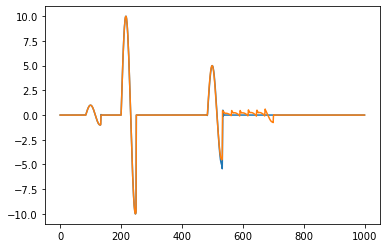

0.7580043135059041 69.96996996996998
   -> Residual Fit valid: False
   -> Residual Fit params: <ValueView x0=0.758004313505904 x1=0.0 x2=-69.41928319126191>
   -> Residual Fit chi2: 0.027596842983589227


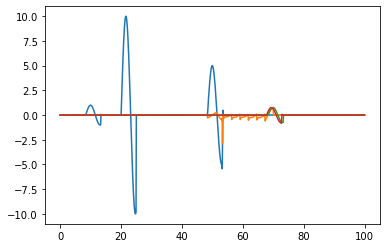

Fitting with Current guess: [9.995255550431251, 0.0, -21.621621621621625, 4.999072814905758, 0.0, -49.94994994994995, 0.9991671381705305, 0.0, -10.01001001001001, 0.49139159416324474, 0.0, -52.91891891891892, 0.5223052715545611, 0.0, -55.7033533205756, 0.5686978765396142, 0.0, -58.41872764330063, 0.610214051783355, 0.0, -61.182058590221565, 0.6534470409164452, 0.0, -63.917848540295374, 0.7072470100230155, 0.0, -66.68794429013542, 0.758004313505904, 0.0, -69.41928319126191]
Fit valid: False
Fit params: <ValueView x0=9.995255550431251 x1=0.0 x2=-21.621621621621625 x3=4.999072814905758 x4=0.0 x5=-49.94994994994995 x6=0.9991671381705305 x7=0.0 x8=-10.01001001001001 x9=0.49139159416324474 x10=0.0 x11=-52.91891891891892 x12=0.5223052715545611 x13=0.0 x14=-55.7033533205756 x15=0.5686978765396142 x16=0.0 x17=-58.41872764330063 x18=0.610214051783355 x19=0.0 x20=-61.182058590221565 x21=0.6534470409164452 x22=0.0 x23=-63.917848540295374 x24=0.7072470100230155 x25=0.0 x26=-66.68794429013542 x27=0.

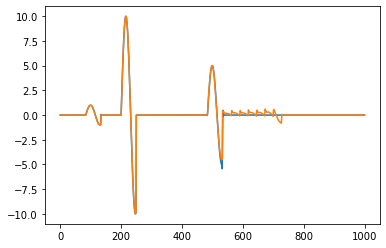

0.8238616609855103 72.67267267267268
   -> Residual Fit valid: False
   -> Residual Fit params: <ValueView x0=0.8238616609855103 x1=0.0 x2=-72.13866881110408>
   -> Residual Fit chi2: 0.03125021399367691


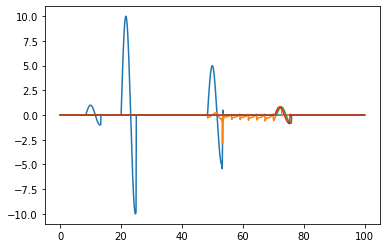

Fitting with Current guess: [9.995255550431251, 0.0, -21.621621621621625, 4.999072814905758, 0.0, -49.94994994994995, 0.9991671381705305, 0.0, -10.01001001001001, 0.49139159416324474, 0.0, -52.91891891891892, 0.5223052715545611, 0.0, -55.7033533205756, 0.5686978765396142, 0.0, -58.41872764330063, 0.610214051783355, 0.0, -61.182058590221565, 0.6534470409164452, 0.0, -63.917848540295374, 0.7072470100230155, 0.0, -66.68794429013542, 0.758004313505904, 0.0, -69.41928319126191, 0.8238616609855103, 0.0, -72.13866881110408]


TimeoutError: Error: Fit did not converge in 10 iterations

In [10]:
fit.do_fit()

In [ ]:
fit.plot()

In [ ]:
fit.do_fit()

In [ ]:
fit.current_guess

In [ ]:
fit.plot()